# Introduction to the NeuroInformatics Platform - FENS 2016 - Part 2

# The KnowledgeGraph


# Querying for data available about the thalamus

<BR><BR>

## From the NIP website (https://nip.humanbrainproject.eu/search/).
As can be seen, the datasets available through the NeuroInformatics Platform can be easily searched by keywords and then downloaded simply by clicking on provided links. 

<img src="https://s32.postimg.org/ldeq7apqd/Screenshot_from_2016_06_21_16_56_16.png" width="100%" height="100%"></img>


<BR><BR>
----------------
----------------
<BR><BR>

## From the KSearch API website (https://nip.humanbrainproject.eu/api/ksearch/swagger/index.html)
Note that the usefulness of this interface might not be obvious at first sight or might seem not attractive to a newcomer. But give it chance and it will grow on you! It does contain all the information needed to query efficiently the available resources.


<img src="https://s31.postimg.org/9su8h46wb/Screenshot_from_2016_06_21_16_51_43.png" width="100%" height="100%"></img>

<CENTER><H1>...</H1></CENTER>

<img src="https://s32.postimg.org/ytnc7l2ed/Screenshot_from_2016_06_21_16_37_19.png" width="100%" height="100%"></img>

## Using this interface, you will get the same JSON response in the "Response Body" field of the form than by querying in Python as we show below.

In [1]:
# Installation of the pySciGraph toolbox which simplifies 
# interfacing the SciGraph-based ontologies through 
# Python.
!pip install --upgrade gitpython --user
import sys, os
if not os.path.isdir("py-SciGraph"):
    !git clone https://github.com/SciGraph/py-SciGraph.git
sys.path.append(os.path.join(os.getcwd(), "py-SciGraph"))

## __init__.py files are not already present in folders so Python has difficulty to
## recognize these folders as packages. So we add these files...
with open(os.path.join(os.getcwd(), "py-SciGraph/scigraph/__init__.py"), "w") as f: pass
with open(os.path.join(os.getcwd(), "py-SciGraph/scigraph/api/__init__.py"), "w") as f: pass
with open(os.path.join(os.getcwd(), "py-SciGraph/scigraph/model/__init__.py"), "w") as f: pass    
from scigraph.api.SciGraph import SciGraph

# Defining the end-point for querying the REST service of the KnowledgeGraph.
base = "https://nip.humanbrainproject.eu/api/ksearch"

# Defining a function to display json strings nicely
import json
def jsonPrettyPrint(jsonStr):
    print json.dumps(jsonStr, sort_keys=True,
                  indent=4, separators=(',', ': '))

Requirement already up-to-date: gitpython in ./.local/lib/python2.7/site-packages
Requirement already up-to-date: gitdb>=0.6.4 in ./.local/lib/python2.7/site-packages (from gitpython)
Requirement already up-to-date: smmap>=0.8.5 in ./.local/lib/python2.7/site-packages (from gitdb>=0.6.4->gitpython)
You are using pip version 8.1.1, however version 8.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## First, we display the types of filter available for search in the KnowledgeGraph

In [2]:
sg = SciGraph(base + "/datasets/filters")

print("Filters available for ksearch: ")
for item in sg.get_response().json():
    print("\t - " + item["name"])

Filters available for ksearch: 
	 - species
	 - methods
	 - protocols
	 - classifications
	 - data_modalities
	 - affiliations
	 - brain_regions


## Then, we list the types of storage available... 
As can be seen, two storage types are available, one based on Zenodo (hosted by the CERN which agreed to host databases for the Human Brain Project) and another managed directly by the HBP team. 

In [3]:
sg = SciGraph(base + "/datasets/storage/types")
jsonPrettyPrint(sg.get_response().json())

[
    {
        "curie": "HBP_STO:0000007",
        "description": "Zenodo builds and operates a service that enables researchers to share and preserve research results.",
        "name": "Zenodo",
        "term_suggest": {
            "output": "Zenodo [HBP_STO:0000007]"
        }
    },
    {
        "curie": "HBP_STO:0000008",
        "description": "Repository maintined by Human Brain Project.",
        "name": "HBP Document service",
        "term_suggest": {
            "output": "HBP Document service [HBP_STO:0000008]"
        }
    }
]


## We can now query for data concerning the thalamus. 
Note that, here, we used "thalamus" as a general keyword rather than specifying explicitly that it should be the region of the cell. This is identical to the search we performed previously using the web interface. As promessed, this output is identical than what we would have obtained in the "Response Body" field of the Swagger-based form. Arguably, the JSON output is rather verbose...

In [4]:
query = "?q=thalamus"
sg = SciGraph(base + "/search" + query)
jsonPrettyPrint(sg.get_response().json())

{
    "aggregations": [
        {
            "buckets": [
                {
                    "doc_count": 1,
                    "key": "Slice Staining for Morphological Cell Reconstruction"
                },
                {
                    "doc_count": 1,
                    "key": "Slice Extraction for Electrophysiology Experiments"
                },
                {
                    "doc_count": 1,
                    "key": "Morphological Reconstruction of a Single Cell"
                },
                {
                    "doc_count": 1,
                    "key": "Labeling of Cells for Morphological Reconstruction"
                }
            ],
            "field": "protocols.title.raw_term",
            "join_back_level": "Dataset",
            "name": "Protocols",
            "total": 4
        },
        {
            "field": "methods.term.raw_term",
            "join_back_level": "Dataset",
            "name": "Methods",
            "total": 0
        

... but contains all the necessary information which, once appropriatly parsed, can be displayed in a similar format than what we had from the search we did using the web interface.

In [5]:

ids = []
for hit in sg.get_response().json()["hits"]:
    print "Title:\t\t" + hit["source"]["title"]
 
    print "Data type:\t" + hit['source']['representations'][0]['datatype']['term']
    print "Storage type:\t" + hit['source']['representations'][0]['storagetype']['term']

    accessId = hit['source']['representations'][0]['access']
    print "Access ID:\t" + accessId
    ids.append(accessId)
    
    contributorNames = [contributor["first_name"] + " " + contributor["last_name"] 
                        for contributor in hit["source"]["contributors"]]
    print "Contributors:\t" + ", ".join(contributorNames)

    species = [specimen["species"]["term"] for specimen in hit["source"]["specimen"]]
    print "Species:\t" + ", ".join(species)
    
    regions = [region["term"] for region in hit["source"]["brain_regions"]]
    print "Brain location:\t" + ", ".join(regions)
    
    cellTypes = [cellType["term"] for cellType in hit["source"]["classifications"]]
    print "Cell types:\t" + ", ".join(cellTypes)  
    
    protocols = [protocol["title"] for protocol in hit["source"]["protocols"]]
    print "Protocols:\t" + "\n\t\t".join(protocols) 


Title:		Morphology reconstruction [RP100427-123_IDG.asc]
Data type:	Neurolucida ASC
Storage type:	HBP Document service
Access ID:	f0a914f7-71ed-4ecd-adc3-abcbb8a95028
Contributors:	Henry Markram, Rodrigo Perin, Meystre Julie, Zoltan Kisvarday
Species:	Rattus norvegicus
Brain location:	Somatosensory cortex hindlimb layer VI
Cell types:	Narrow pyramidal cell projecting to thalamus
Protocols:	Morphological Reconstruction of a Single Cell
		Slice Staining for Morphological Cell Reconstruction
		Labeling of Cells for Morphological Reconstruction
		Slice Extraction for Electrophysiology Experiments


# We can now download the corresponding recordings...

In [6]:
client = get_bbp_client()
fileName = client.document.download_file_by_id(ids[0], "morphology/" + ids[0] + ".asc")
print "Recording saved in ./" + fileName

Recording saved in ./morphology/f0a914f7-71ed-4ecd-adc3-abcbb8a95028.asc


# ... and, after having installed the NeuroM Python package, ...

In [7]:
!pip install neurom  --user

You are using pip version 8.1.1, however version 8.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# ... we can display the corresponding morphology.

<IPython.core.display.Javascript object>


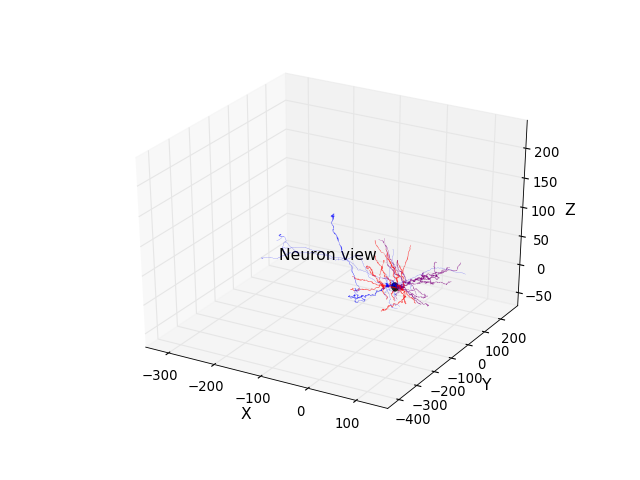

In [9]:
%matplotlib notebook
from neurom import fst, viewer
nrn = fst.load_neuron(fileName)
fig, ax = viewer.draw(nrn, mode='3d')